# CIT AI Youth Camp 2025 - Praktikum 2.2 Klasifikasi Muliclass
*dipersiapkan oleh: Yozef Tjandra*

Tujuan pembelajaran:
* Peserta mampu mengimplementasikan klasifikasi multiclass dengan library Scikitlearn secara lengkap.
* Peserta mampu melakukan analisis hasil kinerja klasifikasi dengan metrik evaluasi yang tepat.

## 01 Import pustaka untuk melakukan klasifikasi

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 02 Tarik dataset untuk melakukan klasifikasi

* Dataset yang digunakan adalah mengenai klasifikasi jenis beans berdasarkan beberapa karakteristik tertentu. 
* Terdapat 16 input/fitur data. 
* Terdapat 7 label yang mungkin dalam output data (memiliki judul kolom ```"Class"```).

| No | Nama Kolom         | Tipe Data | Penjelasan                                                                 |
|----|--------------------|-----------|----------------------------------------------------------------------------|
| 1  | Area               | Numerik   | Luas total dari kacang (jumlah piksel dalam kontur objek).                |
| 2  | Perimeter          | Numerik   | Keliling objek kacang.                                                    |
| 3  | MajorAxisLength    | Numerik   | Panjang sumbu utama dari elips yang pas terhadap objek.                  |
| 4  | MinorAxisLength    | Numerik   | Panjang sumbu kecil dari elips.                                           |
| 5  | AspectRation       | Numerik   | Rasio antara sumbu utama dan sumbu kecil (MajorAxis / MinorAxis).        |
| 6  | Eccentricity       | Numerik   | Mengukur seberapa lonjong bentuk objek (nilai antara 0 - 1).             |
| 7  | ConvexArea         | Numerik   | Luas dari bentuk konveks yang mengelilingi kacang.                        |
| 8  | EquivDiameter      | Numerik   | Diameter lingkaran yang memiliki luas sama dengan objek.                 |
| 9  | Extent             | Numerik   | Rasio antara area objek dengan area dari bounding box.                   |
| 10 | Solidity           | Numerik   | Rasio antara area objek dengan area konveks (Area / ConvexArea).         |
| 11 | roundness          | Numerik   | Ukuran seberapa mendekati bentuk bulat (dari keliling dan luas).         |
| 12 | Compactness        | Numerik   | Mengukur seberapa padat objek itu (perimeter² / area).                   |
| 13 | ShapeFactor1       | Numerik   | Faktor bentuk berbasis fitur geometri.                                   |
| 14 | ShapeFactor2       | Numerik   | Faktor bentuk lainnya.                                                   |
| 15 | ShapeFactor3       | Numerik   | Faktor bentuk lainnya.                                                   |
| 16 | ShapeFactor4       | Numerik   | Faktor bentuk lainnya.                                                   |
| 17 | Class              | Kategorik | Label jenis kacang: 'SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', dll.          |

In [3]:
# Membaca file CSV bernama 'Dry_Beans_Dataset.csv' dan menyimpannya ke dalam variabel DataFrame 'data'
data = pd.read_csv("Harth.csv")

# Menampilkan 20 baris pertama dari dataset untuk melihat isi dan struktur data
data.head(20)

,Unnamed: 0,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,0,2019-01-12 00:00:00.000,-1.108887,0.057861,-0.076904,-1.396973,-0.327148,-0.141846,6
1,1,2019-01-12 00:00:00.020,-1.054932,0.073486,-0.113770,-1.363281,-0.386475,-0.321533,6
2,2,2019-01-12 00:00:00.040,-0.911377,-0.007568,-0.160156,-1.080078,-0.096680,-0.354492,6
3,3,2019-01-12 00:00:00.060,-0.865234,-0.062500,-0.176025,-1.012939,0.163574,-0.229736,6
4,4,2019-01-12 00:00:00.080,-0.992920,-0.026123,-0.178467,-0.989014,0.199951,-0.088379,6
5,5,2019-01-12 00:00:00.100,-1.033203,0.011475,-0.152100,-1.087646,0.045166,-0.016113,6
6,6,2019-01-12 00:00:00.120,-0.975586,-0.020020,-0.069824,-1.149658,-0.137939,0.059326,6
7,7,2019-01-12 00:00:00.140,-0.987305,-0.062256,0.001465,-1.050537,-0.151123,0.146973,6
8,8,2019-01-12 00:00:00.160,-1.023438,-0.060547,0.025391,-0.991211,-0.082275,0.156982,6
9,9,2019-01-12 00:00:00.180,-1.007568,-0.030762,0.001465,-0.951904,-0.101807,0.162354,6


## 03 Eksplorasi dan Visualisasi Data

In [4]:
# Cek dimensi dan informasi umum
print("Jumlah data:", data.shape[0])
print("Jumlah fitur:", data.shape[1] - 1)  # dikurangi label
print("\nInfo dataset:")
print(data.info())
print("\nContoh 5 baris data:")
display(data.head())


Jumlah data: 137646
Jumlah fitur: 8

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137646 entries, 0 to 137645
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  137646 non-null  int64  
 1   timestamp   137646 non-null  object 
 2   back_x      137646 non-null  float64
 3   back_y      137646 non-null  float64
 4   back_z      137646 non-null  float64
 5   thigh_x     137646 non-null  float64
 6   thigh_y     137646 non-null  float64
 7   thigh_z     137646 non-null  float64
 8   label       137646 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 9.5+ MB
None

Contoh 5 baris data:


,Unnamed: 0,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,0,2019-01-12 00:00:00.000,-1.108887,0.057861,-0.076904,-1.396973,-0.327148,-0.141846,6
1,1,2019-01-12 00:00:00.020,-1.054932,0.073486,-0.113770,-1.363281,-0.386475,-0.321533,6
2,2,2019-01-12 00:00:00.040,-0.911377,-0.007568,-0.160156,-1.080078,-0.096680,-0.354492,6
3,3,2019-01-12 00:00:00.060,-0.865234,-0.062500,-0.176025,-1.012939,0.163574,-0.229736,6
4,4,2019-01-12 00:00:00.080,-0.992920,-0.026123,-0.178467,-0.989014,0.199951,-0.088379,6


In [5]:
# Cek apakah ada nilai kosong
print("\nJumlah nilai kosong per kolom:")
print(data.isnull().sum())


Jumlah nilai kosong per kolom:
Unnamed: 0    0
timestamp     0
back_x        0
back_y        0
back_z        0
thigh_x       0
thigh_y       0
thigh_z       0
label         0
dtype: int64


In [6]:
# Distribusi label (kelas kacang)
plt.figure(figsize=(8, 5))



<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

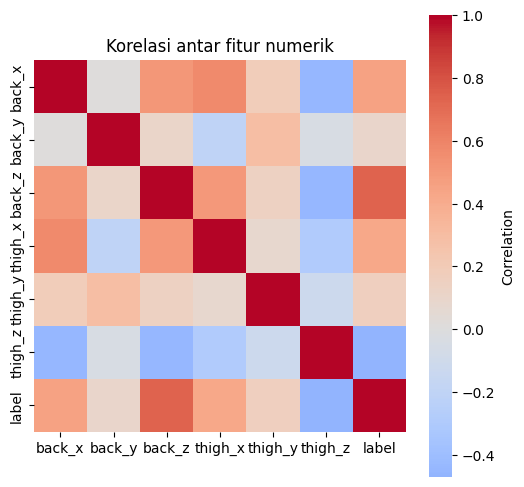

In [13]:
# Korelasi antar fitur numerik
plt.figure(figsize=(6,6))
numeric = data.drop(columns=['timestamp', 'Unnamed: 0']).select_dtypes(include=[np.number])
sns.heatmap(numeric.corr(), annot=False, fmt=".2f", cmap="coolwarm", square=True, center=0, cbar_kws={'label': 'Correlation'})
plt.title("Korelasi antar fitur numerik")
plt.show()


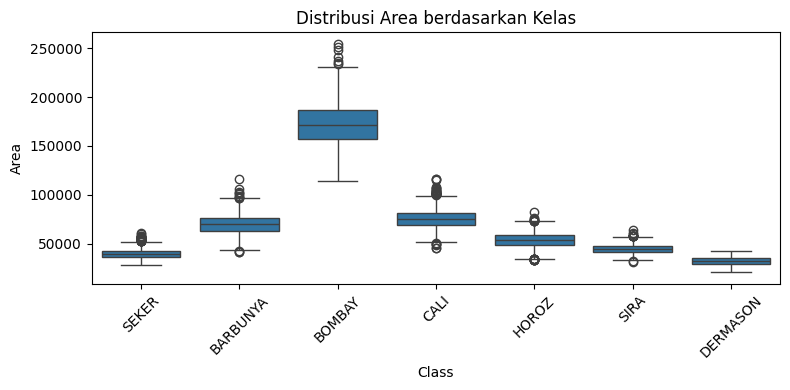

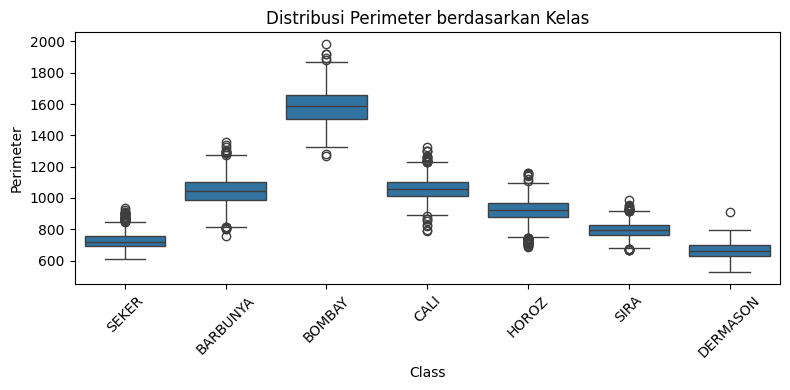

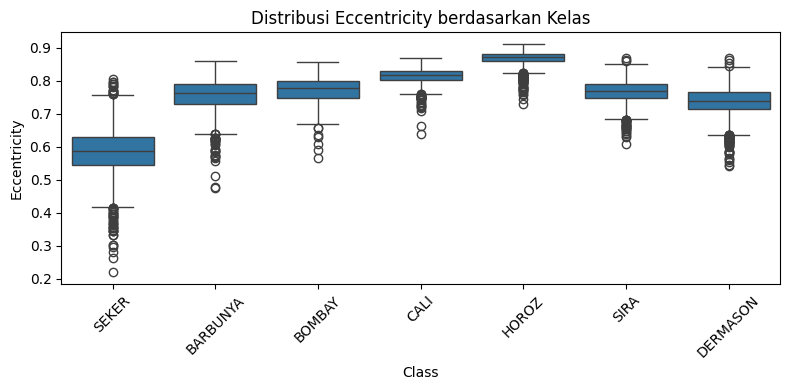

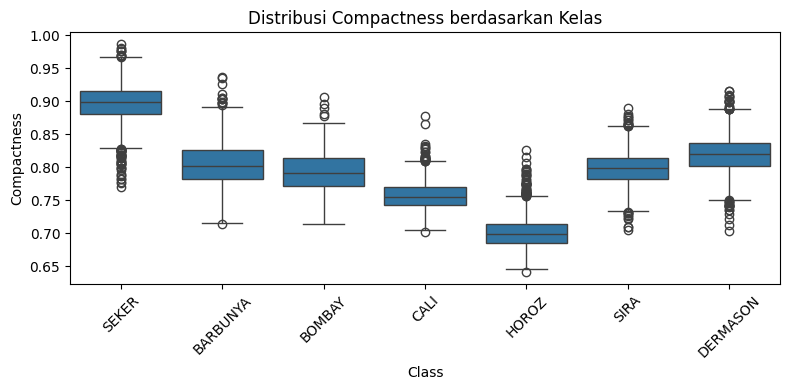

In [ ]:
# Visualisasi distribusi fitur berdasarkan kelas
fitur_pilihan = ['Area', 'Perimeter', 'Eccentricity', 'Compactness']
for col in fitur_pilihan:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x="Class", y=col)
    plt.title(f"Distribusi {col} berdasarkan Kelas")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Eksplorasi: coba variasikan fitur_pilihan dengan fitur lain


## 04 Melakukan pemisahan Data Latih dan Data Uji

In [16]:
from sklearn.model_selection import train_test_split

# Menetapkan variabel target (label) sebagai kolom 'Class'
y = data['label']

# Menghapus kolom 'Bean ID' dan 'Class' dari data fitur
# 'Bean ID' adalah ID unik yang tidak relevan untuk prediksi
X = data.drop(columns=['timestamp', 'Unnamed: 0'])

# Membagi data menjadi 80% data latih dan 20% data uji
# random_state=0 agar hasil pembagian konsisten setiap kali dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Menampilkan jumlah data latih dan data uji
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")    


Jumlah data latih: 110116
Jumlah data uji: 27530


## 05 Membuat dan melatih model Regresi Logistik

In [17]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression (menggunakan parameter default)
logreg = LogisticRegression()

# Melatih model menggunakan data latih (fitur dan label)
logreg.fit(X_train, y_train)

# Menggunakan model untuk memprediksi label dari data uji
y_pred = logreg.predict(X_test)

# Membuat DataFrame untuk membandingkan label sebenarnya dengan hasil prediksi
compare = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})

# Menampilkan tabel perbandingan
display(compare)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,y_true,y_pred
24259,8,8
105267,1,1
37724,1,1
16260,8,8
73537,1,1
...,...,...
94202,1,1
51740,2,2
110122,2,2
17139,8,8


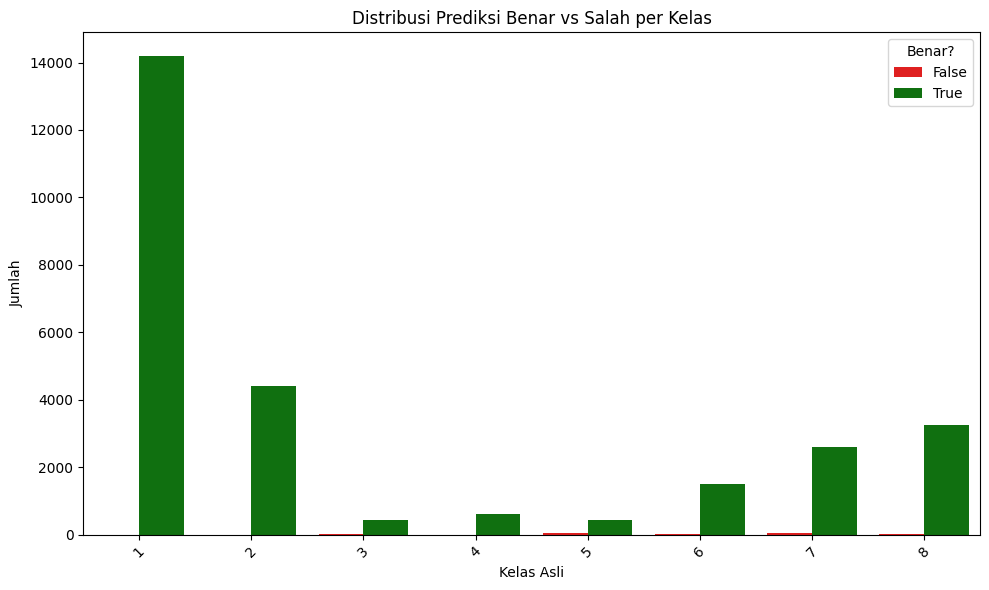

In [18]:
# visualisasi distribusi prediksi benar vs salah per kelas

compare["correct"] = compare["y_true"] == compare["y_pred"]

plt.figure(figsize=(10, 6))
sns.countplot(data=compare, x="y_true", hue="correct", palette={True: "green", False: "red"})
plt.title("Distribusi Prediksi Benar vs Salah per Kelas")
plt.xlabel("Kelas Asli")
plt.ylabel("Jumlah")
plt.legend(title="Benar?")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 06 Melakukan Evaluasi Model

In [19]:
# Mengimpor modul 'metrics' dari scikit-learn yang berisi fungsi-fungsi evaluasi model
from sklearn import metrics

# Membuat confusion matrix berdasarkan label asli (y_test) dan label hasil prediksi (y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dalam bentuk array 2D
cnf_matrix

array([[14187,     0,     0,     0,     0,     0,     0,     0],
       [    0,  4418,     0,     0,     0,     0,     0,     0],
       [    0,     1,   426,     1,     0,     0,     0,     0],
       [    0,     0,     1,   616,     0,     0,     0,     0],
       [    0,     0,     1,     1,   425,    22,     8,     6],
       [    0,     0,     0,     0,     6,  1510,     3,     1],
       [    0,     0,     0,     0,     0,    13,  2588,    32],
       [    0,     0,     0,     0,     1,    12,    10,  3241]],
      dtype=int64)

[1 2 3 4 5 6 7 8]


Text(0.5, 427.9555555555555, 'Predicted label')

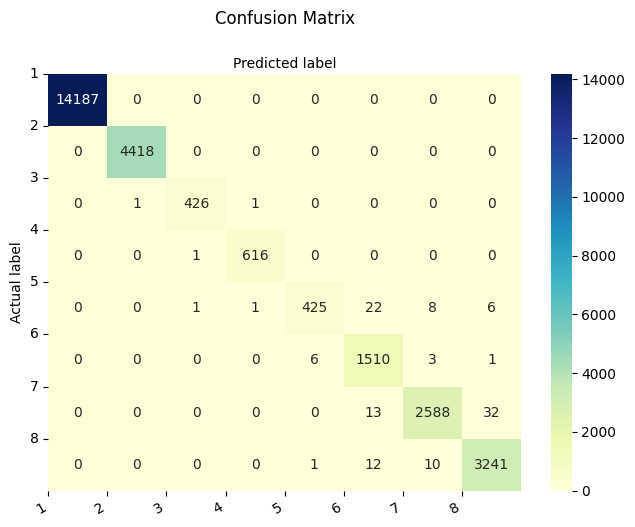

In [20]:
# visualisasi confusion matrix menggunakan seaborn

# Ambil daftar unik nama kelas dari label asli (y)
class_names = logreg.classes_  # nama-nama kelas
print(class_names)

# Buat area plotting
fig, ax = plt.subplots()

# Visualisasi confusion matrix dalam bentuk heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Atur posisi label sumbu-x ke atas
ax.xaxis.set_label_position("top")

# Tentukan posisi tick (label sumbu)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=30, ha="right")       # Label prediksi (sumbu-x)
plt.yticks(tick_marks, class_names, rotation='horizontal')         # Label aktual (sumbu-y)

# Atur tampilan layout agar tidak saling bertabrakan
plt.tight_layout()

# Tambahkan judul dan label sumbu
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
# tampilkan classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14187
           2       1.00      1.00      1.00      4418
           3       1.00      1.00      1.00       428
           4       1.00      1.00      1.00       617
           5       0.98      0.92      0.95       463
           6       0.97      0.99      0.98      1520
           7       0.99      0.98      0.99      2633
           8       0.99      0.99      0.99      3264

    accuracy                           1.00     27530
   macro avg       0.99      0.99      0.99     27530
weighted avg       1.00      1.00      1.00     27530



## Tugas Praktikum

1. Lakukan proses klasifikasi dengan menggunakan dataset HARTH: https://archive.ics.uci.edu/dataset/779/harth
2. Lakukan proses evaluasi dengan confusion matrix & classification report.